# Peyman hashemi
# 400131032

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np
from collections import Counter
from numpy.linalg import matrix_power
import random


# A

In [35]:
graph = nx.Graph()
for i in range(1,7625):
    graph.add_node(i) 


for i in range(1,7625):
      for j in range(1,7625):
         choice = random.randint(1,4)
         if choice ==2 :
           if graph.number_of_edges()<27806:
             graph.add_edge(i, j)
           if graph.number_of_edges()>=27806:  
             break 
nx.info(graph)

C:\Users\Peter\AppData\Local\Temp\ipykernel_5392\1113824243.py:14: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(graph)


'Graph with 7624 nodes and 27806 edges'

# B


In [27]:
small_world = nx.Graph()
for i in range(1,7625):
    small_world.add_node(i)

for i in range(1,7625):
    small_world.add_edge(i, i+1)
    small_world.add_edge(i, 7625-(i+1))

    if  small_world.number_of_edges() < 27806:
       for i in range(1,7624):    
          small_world.add_edge(i, i+2)
          small_world.add_edge(i, 7625-(i+2))       
    if  small_world.number_of_edges() >= 27807:
      break

while small_world.number_of_edges() < 27806:
    for i in range(1,7625):
        for j in range(1,7625):
            if small_world.number_of_edges() < 27806:
                choice = random.randint(1,4)
                if small_world.add_edge(i,j) == -1 and choice == 2:
                    small_world.add_edge(i,j)
            else:
               break     
nx.info(small_world)

C:\Users\Peter\AppData\Local\Temp\ipykernel_5392\1875682620.py:25: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(small_world)


'Graph with 7626 nodes and 27806 edges'

# c


In [11]:
lastFM = pd.read_csv(r'I:\peter\AUT\semister 3\complex\EX\lastfm_asia\lasftm_asia\lastfm_asia_edges.csv',na_values='?', comment='\t', sep=',', skipinitialspace=True, header=0)

In [12]:
lastFM

,node_1,node_2
0,0,747
1,1,4257
2,1,2194
3,1,580
4,1,6478
...,...,...
27801,7488,7564
27802,7505,7579
27803,7533,7536
27804,7569,7587


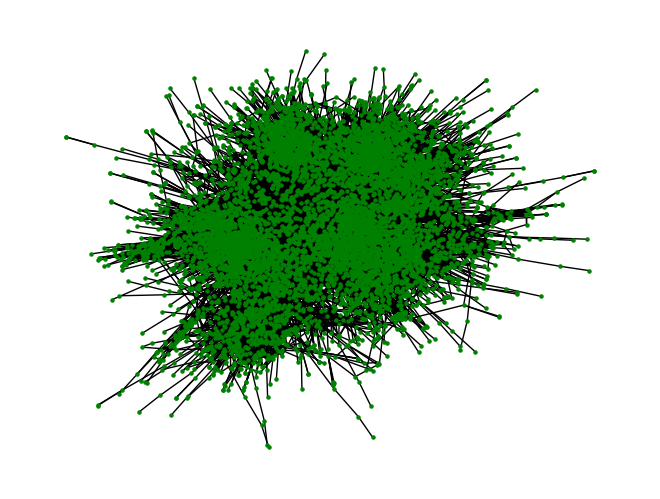

In [13]:
edgeno= 27807 
dataset = lastFM.head(edgeno)
lastfm=nx.from_pandas_edgelist(dataset, 'node_1', 'node_2')
# Draw graph
pos = nx.spring_layout(lastfm)  
nx.draw(lastfm, pos, node_color="g", node_size=5, with_labels=False)

# D

In [14]:
def log_log(Graph):
  degs = {}
  for n in Graph.nodes():
    deg = Graph.degree(n) 
    if d not in degs:
      degs[d] = 0 
    degs[d] += 1
  nodes = sorted(degs.items())

  fig = plt.figure(figsize=(8,6))
  ax = fig.add_subplot(111)
  ax.plot([key for (key,value) in nodes], [value for (key,value) in nodes],c='darkcyan') 
  ax.set_xscale('log') 
  ax.set_yscale('log')
  ax.set_xlabel("log Degree")
  ax.set_ylabel("log Frequency of Nodes")
  plt.title("Degree Distribution Log Plot")
  plt.show()
  x = fig.savefig("degree_distribution_log.png")
  return x

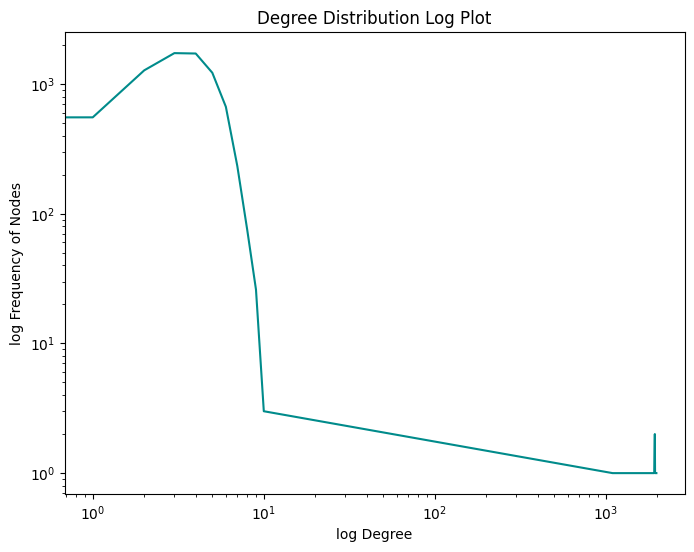

In [16]:
log_log(graph)


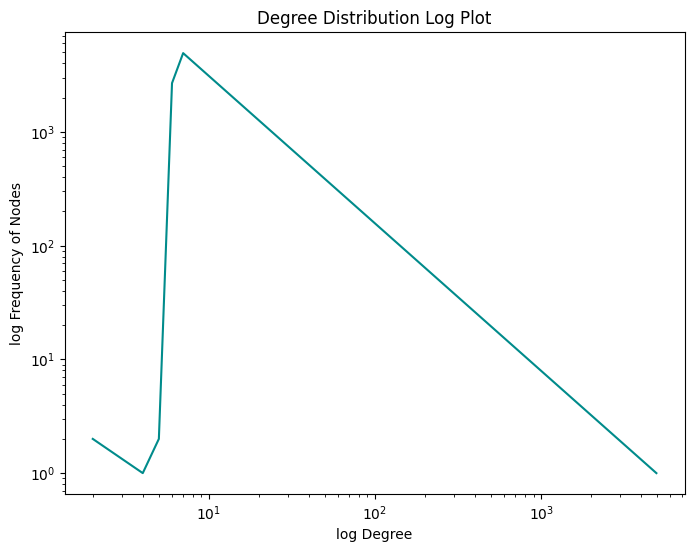

In [17]:
log_log(small_world)

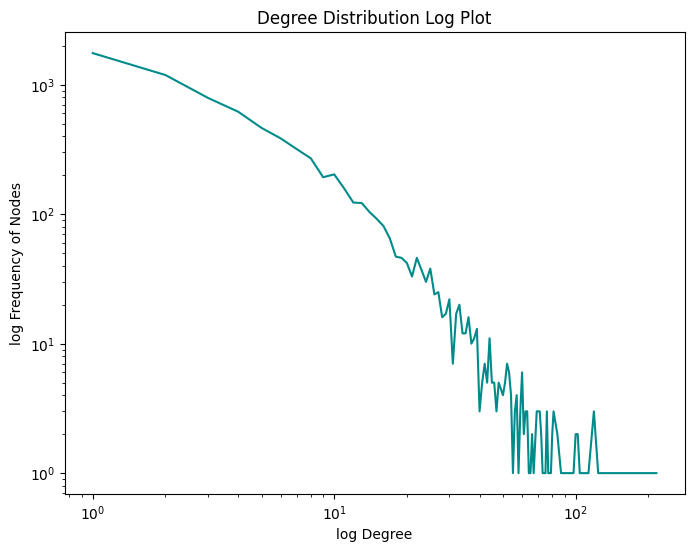

In [18]:
log_log(lastfm)


# E

In [21]:
def coefficient(X):
  Ci =  []
  for n in X.nodes():
    di = X.degree(n) 
    Ei = 0
    x = np.array(list(nx.neighbors(X , n)))
    for i in x:
      y = np.array(list(nx.neighbors(X , i)))
    z = np.intersect1d(x , y)  
    Ei = len(z)
    if di == 0 or di == 1:
      Ci.append(0)
    else:  
      ci = Ei / (di*(di-1))
      Ci.append(ci)
    res = sum(Ci) / X.number_of_nodes() 
  return  res  

In [36]:
print(f"result of endros_renyi Network : ",coefficient(graph)),


result of endros_renyi Network :  0.12598837385480655


(None,)

In [30]:
print(f"result of small world Network : ",coefficient(small_world)),


result of small world Network :  0.12648583170545874


(None,)

In [31]:
print(f"result of lastfm Network : ",coefficient(lastfm)),


result of lastfm Network :  0.05364706035908317


(None,)